<a href="https://colab.research.google.com/github/ninjaa1234/Learning_New/blob/main/Machine_Learning/Outlier_zscore%2C_std().ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


In [6]:
matplotlib.rcParams['figure.figsize']=(10,6)

In [8]:
df=pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/FeatureEngineering/2_outliers_z_score/heights.csv")
df.sample(5)

,gender,height
559,Male,64.727257
3843,Male,67.618529
3504,Male,70.881608
9157,Female,64.390033
9835,Female,66.588941


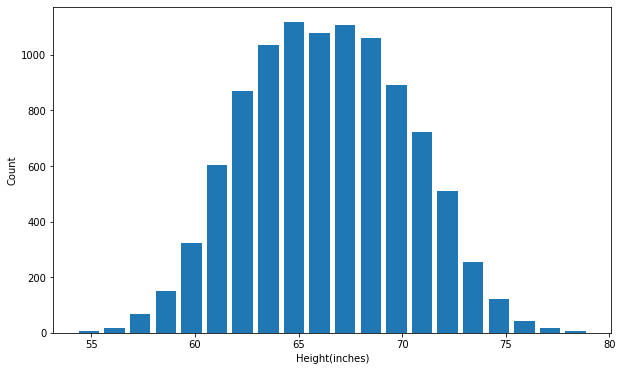

In [10]:
plt.hist(df.height,bins=20,rwidth=0.8)
plt.xlabel('Height(inches)')
plt.ylabel('Count')
plt.show()

In [14]:
df.height.min()

54.26313333

In [16]:
df.height.max()

78.99874235

In [18]:
df.height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: height, dtype: float64

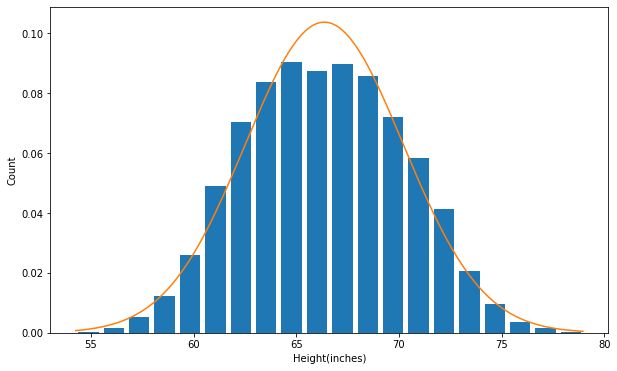

In [21]:
import numpy as np

from scipy.stats import norm

plt.hist(df.height,bins=20,rwidth=0.8,density=True)
plt.xlabel('Height(inches)')
plt.ylabel('Count')

rng=np.arange(df.height.min(), df.height.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.height.mean(),df.height.std()))

In [22]:
df.height.mean()

66.3675597548656

In [23]:
df.height.std()

3.847528120795573

#3 std outlier

In [25]:
upper_limit = df.height.mean() + 3*df.height.std()          #anything above that is an outlier
upper_limit

77.91014411725232

In [27]:
lower_limit = df.height.mean() -3*df.height.std()
lower_limit

54.824975392478876

In [32]:
df[(df.height > upper_limit) | (df.height < lower_limit)]           #greater than upper limit or lower than lower limit

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [35]:
df_no_putliner_std_dev = df[(df.height<upper_limit) & (df.height > lower_limit)]
df_no_putliner_std_dev.shape

(9993, 2)

In [39]:
df.shape[0] - df_no_putliner_std_dev.shape[0]     #to find the no of outliers we removed

7

#Z score Outliers

![picture](https://drive.google.com/uc?export=view&id=1jt5GJ9kX0Ai6L6oO65QZF3dru9k5-1gC)

![picture](https://drive.google.com/uc?export=view&id=1cCPsbN4rx0sdJLaIg0lmNwPwkXW06kBQ)

In [41]:
df['zscore'] = (df.height - df.height.mean())/df.height.std()
df.head(5)

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [43]:
df[df.zscore>3]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [44]:
df[df.zscore<-3]

,gender,height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [46]:
df[(df.zscore>3 )| (df.zscore<-3)]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [49]:
df_no_outliers = df[(df.zscore>-3 ) & (df.zscore<3)]
df_no_outliers.head()

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [50]:
df.shape[0] - df_no_putliner_std_dev.shape[0]

7